In [1]:
# %matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scaling_tables import *

## Read raw data - one row per iteration

**The main variables used here:**

- dense_all - all dense experiments, each row is one iteration
- sparse_all - all sparse experiments, each row is one iteration
- sparse_wts - experiments with weight sparsity only, each row is one iteration
- sparse_activations - experiments with both weight and activation sparsity, each row is one iteration


In [3]:
sparse_all = pd.read_pickle("sparse_scaling.pkl")

In [4]:
dense_all = pd.read_pickle("dense_scaling_baselines.pkl")

In [5]:
sparse_activations = sparse_all[sparse_all["Activation sparsity"] == 1]

In [6]:
sparse_wts = sparse_all[sparse_all["Activation sparsity"] == 0]

In [7]:
sparse_all.head()

,Experiment name,L1 channels,L2 channels,L3 N,L1 Wt sparsity,L2 Wt sparsity,L3 Wt sparsity,Activation sparsity,Non-zero params,Accuracy,Iteration,Best accuracy,L2 dimensionality,L3 dimensionality,Seed,ID
0,Sparse_Baselines,64,128,1000,0.0,0.99,0.995,0,32852,74.098746,0,95.101881,1600,3200,5882,Sparse_Baselines cnn_out_channels=(64 128)cnn_...
1,Sparse_Baselines,64,128,1000,0.0,0.99,0.995,0,32852,63.597179,1,95.101881,1600,3200,5882,Sparse_Baselines cnn_out_channels=(64 128)cnn_...
2,Sparse_Baselines,64,128,1000,0.0,0.99,0.995,0,32852,67.633229,2,95.101881,1600,3200,5882,Sparse_Baselines cnn_out_channels=(64 128)cnn_...
3,Sparse_Baselines,64,128,1000,0.0,0.99,0.995,0,32852,52.664577,3,95.101881,1600,3200,5882,Sparse_Baselines cnn_out_channels=(64 128)cnn_...
4,Sparse_Baselines,64,128,1000,0.0,0.99,0.995,0,32852,19.592476,4,95.101881,1600,3200,5882,Sparse_Baselines cnn_out_channels=(64 128)cnn_...


In [8]:
dense_all.head()

,Experiment name,L1 channels,L2 channels,L3 N,L1 Wt sparsity,L2 Wt sparsity,L3 Wt sparsity,Non-zero params,Accuracy,Iteration,Best accuracy,L2 dimensionality,L3 dimensionality,Seed,ID
0,Dense_Baselines,32,32,1000,0.0,0.0,0.0,839476,9.796238,0,95.924765,800,800,1031,Dense_Baselines cnn_out_channels=(32 32)linear...
1,Dense_Baselines,32,32,1000,0.0,0.0,0.0,839476,85.031348,1,95.924765,800,800,1031,Dense_Baselines cnn_out_channels=(32 32)linear...
2,Dense_Baselines,32,32,1000,0.0,0.0,0.0,839476,26.410658,2,95.924765,800,800,1031,Dense_Baselines cnn_out_channels=(32 32)linear...
3,Dense_Baselines,32,32,1000,0.0,0.0,0.0,839476,52.390282,3,95.924765,800,800,1031,Dense_Baselines cnn_out_channels=(32 32)linear...
4,Dense_Baselines,32,32,1000,0.0,0.0,0.0,839476,89.811912,4,95.924765,800,800,1031,Dense_Baselines cnn_out_channels=(32 32)linear...


In [9]:
sparse_all.describe()

,L1 Wt sparsity,L2 Wt sparsity,L3 Wt sparsity,Accuracy,Best accuracy
count,163200.0,163200.000000,163200.000000,163200.000000,163200.000000
mean,0.0,0.942712,0.978618,83.643030,96.517949
std,0.0,0.061431,0.015289,21.322678,0.594588
min,0.0,0.800000,0.950000,6.269592,94.004702
25%,0.0,0.900000,0.975000,83.307210,96.159875
50%,0.0,0.980000,0.980000,93.887147,96.630094
75%,0.0,0.990000,0.990000,95.728840,96.943574
max,0.0,0.997000,0.995000,97.923197,97.923197


In [10]:
dense_all.describe()

,L1 Wt sparsity,L2 Wt sparsity,L3 Wt sparsity,Accuracy,Best accuracy
count,3000.0,3000.0,3000.0,3000.000000,3000.000000
mean,0.0,0.0,0.0,86.035697,96.734326
std,0.0,0.0,0.0,20.437721,0.329405
min,0.0,0.0,0.0,8.150470,95.768025
25%,0.0,0.0,0.0,88.430643,96.541928
50%,0.0,0.0,0.0,95.532915,96.786834
75%,0.0,0.0,0.0,96.394984,96.943574
max,0.0,0.0,0.0,97.413793,97.413793


In [11]:
sparse_activations.describe()

,L1 Wt sparsity,L2 Wt sparsity,L3 Wt sparsity,Accuracy,Best accuracy
count,50400.0,50400.000000,50400.000000,50400.000000,50400.000000
mean,0.0,0.940686,0.980000,95.030941,96.519257
std,0.0,0.065013,0.014268,1.833086,0.630095
min,0.0,0.800000,0.950000,68.495298,94.004702
25%,0.0,0.900000,0.975000,94.435737,96.159875
50%,0.0,0.980000,0.980000,95.532915,96.630094
75%,0.0,0.990000,0.990000,96.238245,96.982759
max,0.0,0.997000,0.995000,97.923197,97.923197


In [12]:
sparse_wts.describe()

,L1 Wt sparsity,L2 Wt sparsity,L3 Wt sparsity,Accuracy,Best accuracy
count,112800.0,112800.000000,112800.000000,112800.000000,112800.000000
mean,0.0,0.943617,0.978000,78.554815,96.517364
std,0.0,0.059740,0.015684,23.926276,0.578020
min,0.0,0.800000,0.950000,6.269592,94.004702
25%,0.0,0.900000,0.975000,70.101881,96.159875
50%,0.0,0.980000,0.980000,90.713166,96.590909
75%,0.0,0.990000,0.990000,95.101881,96.943574
max,0.0,0.995000,0.995000,97.766458,97.766458


## Dataframe containing one row per trial

**The dataframes defined here:**

- dense_trial - dense experiments, where each row is one complete trial.
- sparse_wts_trial - sparse weights experiments, where each row is one complete trial.
- sparse_activations_trial - experiments with sparse weights and activations, where each row is one complete trial.

In these dataframes, in each row, max_accuracy is the maximum test accuracy reached during the trial.



In [13]:
def create_trial_df(df):
    dft= df.groupby(["ID","Seed"]).agg(
        # Max accuracy for that trial
        max_accuracy=('Accuracy', "max"),
        l1_channels=('L1 channels', "first"),
        l2_channels=('L2 channels', "first"),
        l3_n=("L3 N", "first"),
        l2_dim=('L2 dimensionality', "first"),
        l3_dim=('L3 dimensionality', "first"),
        l1_wt_sparsity=("L1 Wt sparsity", "first"),
        l2_wt_sparsity=("L2 Wt sparsity", "first"),
        l3_wt_sparsity=("L3 Wt sparsity", "first"),
        non_zero_params=('Non-zero params', "first"),
        config=('ID', "first"),
    )
    dft["l2_wts_per_kernel"] = dft.apply(lambda x: (x["l1_channels"] * 25 * (1-x["l2_wt_sparsity"])), axis=1)
    dft["l3_wts_per_unit"] = dft.apply(lambda x: (x["l2_channels"] * 25 * (1-x["l3_wt_sparsity"])), axis=1)
    dft["dimensions"] = dft.apply(lambda x: np.sqrt(x["l3_n"] * x["l3_dim"]), axis=1)
    return dft

In [14]:
sparse_wts_trial = create_trial_df(sparse_wts)

In [15]:
sparse_activations_trial = create_trial_df(sparse_activations)

In [16]:
dense_trial = create_trial_df(dense_all)

In [17]:
sparse_wts_trial.head()

max_accuracy  \
ID                                                 Seed                 
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766     95.415361   
                                                   2491     95.297806   
                                                   4711     95.101881   
                                                   5882     95.101881   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 2405     95.807210   

                                                         l1_channels  \
ID                                                 Seed                
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766           64   
                                                   2491           64   
                                                   4711           64   
                                                   5882           64   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 2405           64   

                                                         l2_channels  l3_n  \
ID                                                 Seed                      
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766          128  1000   
                                                   2491          128  1000   
                                                   4711          128  1000   
                                                   5882          128  1000   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 2405          128  1000   

                                                         l2_dim  l3_dim  \
ID                                                 Seed                   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766    1600    3200   
                                                   2491    1600    3200   
                                                   4711    1600    3200   
                                                   5882    1600    3200   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 2405    1600    3200   

                                                         l1_wt_sparsity  \
ID                                                 Seed                   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766             0.0   
                                                   2491             0.0   
                                                   4711             0.0   
                                                   5882             0.0   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 2405             0.0   

                                                         l2_wt_sparsity  \
ID                                                 Seed                   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766            0.99   
                                                   2491            0.99   
                                                   4711            0.99   
                                                   5882            0.99   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 2405            0.99   

                                                         l3_wt_sparsity  \
ID                                                 Seed                   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766           0.995   
                                                   2491           0.995   
                                                   4711           0.995   
                                                   5882           0.995   
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 2405           0.990   

                                                         non_zero_params  \
ID                                                 Seed                    
Sparse_Baselines cnn_out_channels=(64 128)cnn_w... 1766            32852   
                                                   2491            32852   
                                                   4711            32852   
         

In [18]:
sparse_wts_trial.describe()

,max_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,non_zero_params,l2_wts_per_kernel,l3_wts_per_unit,dimensions
count,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.0,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000,3760.000000
mean,96.517364,74.212766,150.468085,1152.925532,1855.319149,3761.702128,0.0,0.943617,0.978000,124536.627660,99.659574,82.757447,1997.071238
std,0.578094,14.918683,47.108169,474.353656,372.967086,1177.704232,0.0,0.059748,0.015686,91842.151866,100.028041,67.040479,496.868706
min,94.004702,64.000000,64.000000,500.000000,1600.000000,1600.000000,0.0,0.800000,0.950000,18514.000000,8.000000,8.000000,1095.445115
25%,96.159875,64.000000,128.000000,750.000000,1600.000000,3200.000000,0.0,0.900000,0.975000,60488.000000,16.000000,32.000000,1549.193338
50%,96.590909,64.000000,160.000000,1000.000000,1600.000000,4000.000000,0.0,0.980000,0.980000,96856.000000,48.000000,64.000000,1897.366596
75%,96.943574,96.000000,192.000000,1500.000000,2400.000000,4800.000000,0.0,0.990000,0.990000,160267.000000,160.000000,112.000000,2366.431913
max,97.766458,96.000000,224.000000,2000.000000,2400.000000,5600.000000,0.0,0.995000,0.995000,569308.000000,320.000000,280.000000,3098.386677


In [19]:
sparse_activations_trial.describe()

,max_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,non_zero_params,l2_wts_per_kernel,l3_wts_per_unit,dimensions
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,96.519257,68.571429,118.857143,1366.071429,1714.285714,2971.428571,0.0,0.940686,0.980000,107470.700000,96.914286,56.571429,1954.344418
std,0.630277,11.201002,49.532692,468.556304,280.025038,1238.317311,0.0,0.065032,0.014272,69886.093785,103.528176,41.655522,562.530480
min,94.004702,64.000000,64.000000,750.000000,1600.000000,1600.000000,0.0,0.800000,0.950000,18514.000000,4.800000,8.000000,1095.445115
25%,96.159875,64.000000,96.000000,1000.000000,1600.000000,2400.000000,0.0,0.900000,0.975000,56018.000000,16.000000,24.000000,1549.193338
50%,96.630094,64.000000,128.000000,1500.000000,1600.000000,3200.000000,0.0,0.980000,0.980000,87363.000000,48.000000,48.000000,1788.854382
75%,96.982759,64.000000,128.000000,2000.000000,1600.000000,3200.000000,0.0,0.990000,0.990000,142311.000000,160.000000,80.000000,2234.775651
max,97.923197,96.000000,224.000000,2000.000000,2400.000000,5600.000000,0.0,0.997000,0.995000,388764.000000,320.000000,160.000000,3346.640106


In [20]:
dense_trial.describe()

,max_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,non_zero_params,l2_wts_per_kernel,l3_wts_per_unit,dimensions
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,1.000000e+02,100.000000,100.000000,100.000000
mean,96.734326,57.600000,70.400000,1150.000000,1440.000000,1760.000000,0.0,0.0,0.0,2.148050e+06,1440.000000,1760.000000,1332.588378
std,0.331010,12.864484,37.506094,541.229427,321.612101,937.652345,0.0,0.0,0.0,1.576132e+06,321.612101,937.652345,500.714858
min,95.768025,32.000000,32.000000,500.000000,800.000000,800.000000,0.0,0.0,0.0,4.329760e+05,800.000000,800.000000,632.455532
25%,96.541928,64.000000,32.000000,750.000000,1600.000000,800.000000,0.0,0.0,0.0,9.106400e+05,1600.000000,800.000000,894.427191
50%,96.786834,64.000000,64.000000,1000.000000,1600.000000,1600.000000,0.0,0.0,0.0,1.678908e+06,1600.000000,1600.000000,1264.911064
75%,96.943574,64.000000,96.000000,1500.000000,1600.000000,2400.000000,0.0,0.0,0.0,2.616354e+06,1600.000000,2400.000000,1549.193338
max,97.413793,64.000000,128.000000,2000.000000,1600.000000,3200.000000,0.0,0.0,0.0,6.632604e+06,1600.000000,3200.000000,2529.822128


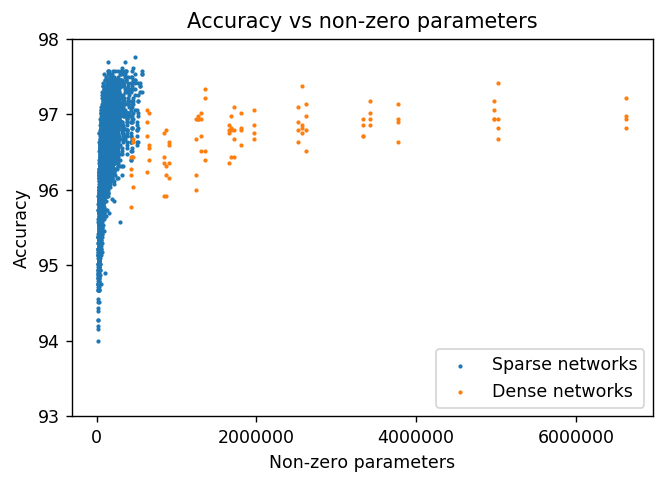

In [21]:
fig = plt.figure(dpi=125)
plt.title("Accuracy vs non-zero parameters")
plt.xlabel("Non-zero parameters")
plt.ylabel("Accuracy")
plt.ylim(93, 98)
plt.scatter(sparse_wts_trial["non_zero_params"], sparse_wts_trial["max_accuracy"], label="Sparse networks", s=2)
plt.scatter(dense_trial["non_zero_params"], dense_trial["max_accuracy"], label="Dense networks", s=2)
plt.xticks(np.arange(0, 7000000, 2000000))
plt.legend(loc="lower right")
plt.savefig("plots/overall_accuracies.png", dpi=300)

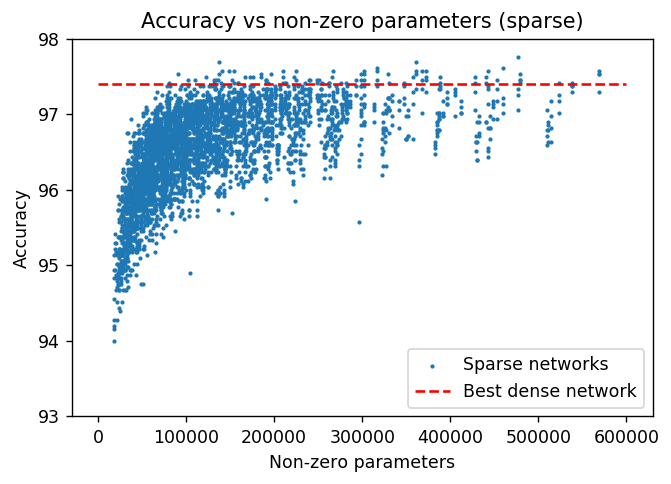

In [22]:
fig = plt.figure(dpi=125)
plt.title("Accuracy vs non-zero parameters (sparse)")
plt.xlabel("Non-zero parameters")
plt.ylabel("Accuracy")
plt.ylim(93, 98)
plt.xticks(np.arange(0, 400001, 100000))
plt.scatter(sparse_wts_trial["non_zero_params"], sparse_wts_trial["max_accuracy"], label="Sparse networks", s=2)
plt.savefig("plots/overall_accuracies_sparse.png", dpi=300)
plt.hlines(97.4, 0, 600001, label="Best dense network", linestyle="dashed", colors="red")
plt.xticks(np.arange(0, 600001, 100000))
plt.legend(loc="lower right")
plt.savefig("plots/overall_accuracies_sparse2.png", dpi=300)

## Dataframe with one row per network configuration

**The dataframes defined here:**

Each row contains the mean max_accuracy for each unique network configuration (ID), averaged over all the random seeds.

- dense_id - dense experiments, where each row is one complete trial.
- sparse_wts_id - sparse weights experiments, where each row is one complete trial.
- sparse_activations_id - experiments with sparse weights and activations, where each row is one complete trial.



In [23]:
def create_id_dataframe(df):
    dfi= df.groupby(["config"]).agg(
        mean_accuracy=('max_accuracy', "mean"),
        l1_channels=('l1_channels', "first"),
        l2_channels=('l2_channels', "first"),
        l3_n=("l3_n", "first"),
        l2_dim=('l2_dim', "first"),
        l3_dim=('l3_dim', "first"),
        l1_wt_sparsity=("l1_wt_sparsity", "first"),
        l2_wt_sparsity=("l2_wt_sparsity", "first"),
        l3_wt_sparsity=("l3_wt_sparsity", "first"),
        l2_wts_per_kernel=("l2_wts_per_kernel", "first"),
        l3_wts_per_unit=("l3_wts_per_unit", "first"),
        dimensions=('dimensions', "first"),
        non_zero_params=('non_zero_params', "first"),
        config=('config', "first"),
        num_trials=('config', "count"),
    )
    return dfi

In [24]:
sparse_wts_id = create_id_dataframe(sparse_wts_trial)

In [25]:
dense_id = create_id_dataframe(dense_trial)

In [26]:
sparse_activations_id = create_id_dataframe(sparse_activations_trial)

In [27]:
sparse_wts_id.head()

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,config,num_trials
config,,,,,,,,,,,,,,,
Sparse_Baselines cnn_out_channels=(64 128)cnn_weight_sparsity=(0.0 0.01)linear_n=(1000)weight_sparsity=(0.005),95.229232,64,128,1000,1600,3200,0.0,0.99,0.995,16.0,16.0,1788.854382,32852,Sparse_Baselines cnn_out_channels=(64 128)cnn_...,4
Sparse_Baselines cnn_out_channels=(64 128)cnn_weight_sparsity=(0.0 0.01)linear_n=(1000)weight_sparsity=(0.01),95.856191,64,128,1000,1600,3200,0.0,0.99,0.990,16.0,32.0,1788.854382,48852,Sparse_Baselines cnn_out_channels=(64 128)cnn_...,4
Sparse_Baselines cnn_out_channels=(64 128)cnn_weight_sparsity=(0.0 0.01)linear_n=(1000)weight_sparsity=(0.02),96.189263,64,128,1000,1600,3200,0.0,0.99,0.980,16.0,64.0,1788.854382,80852,Sparse_Baselines cnn_out_channels=(64 128)cnn_...,4
Sparse_Baselines cnn_out_channels=(64 128)cnn_weight_sparsity=(0.0 0.01)linear_n=(1000)weight_sparsity=(0.025),96.385188,64,128,1000,1600,3200,0.0,0.99,0.975,16.0,80.0,1788.854382,96852,Sparse_Baselines cnn_out_channels=(64 128)cnn_...,4
Sparse_Baselines cnn_out_channels=(64 128)cnn_weight_sparsity=(0.0 0.01)linear_n=(1000)weight_sparsity=(0.05),96.551724,64,128,1000,1600,3200,0.0,0.99,0.950,16.0,160.0,1788.854382,176852,Sparse_Baselines cnn_out_channels=(64 128)cnn_...,4


In [28]:
sparse_wts_id.describe()

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,num_trials
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0
mean,96.517364,74.212766,150.468085,1152.925532,1855.319149,3761.702128,0.0,0.943617,0.978000,99.659574,82.757447,1997.071238,124536.627660,4.0
std,0.541913,14.924640,47.126979,474.543057,373.116005,1178.174468,0.0,0.059772,0.015693,100.067980,67.067247,497.067096,91878.822721,0.0
min,94.298589,64.000000,64.000000,500.000000,1600.000000,1600.000000,0.0,0.800000,0.950000,8.000000,8.000000,1095.445115,18514.000000,4.0
25%,96.196611,64.000000,128.000000,750.000000,1600.000000,3200.000000,0.0,0.900000,0.975000,16.000000,32.000000,1549.193338,60488.000000,4.0
50%,96.590909,64.000000,160.000000,1000.000000,1600.000000,4000.000000,0.0,0.980000,0.980000,48.000000,64.000000,1897.366596,96856.000000,4.0
75%,96.933777,96.000000,192.000000,1500.000000,2400.000000,4800.000000,0.0,0.990000,0.990000,160.000000,112.000000,2366.431913,160267.000000,4.0
max,97.531348,96.000000,224.000000,2000.000000,2400.000000,5600.000000,0.0,0.995000,0.995000,320.000000,280.000000,3098.386677,569308.000000,4.0


In [29]:
sparse_activations_id.describe()

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,num_trials
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.0,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.0
mean,96.519257,68.571429,118.857143,1366.071429,1714.285714,2971.428571,0.0,0.940686,0.980000,96.914286,56.571429,1954.344418,107470.700000,4.0
std,0.608600,11.211022,49.577004,468.975469,280.275545,1239.425095,0.0,0.065090,0.014285,103.620792,41.692786,563.033713,69948.613041,0.0
min,94.288793,64.000000,64.000000,750.000000,1600.000000,1600.000000,0.0,0.800000,0.950000,4.800000,8.000000,1095.445115,18514.000000,4.0
25%,96.159875,64.000000,96.000000,1000.000000,1600.000000,2400.000000,0.0,0.900000,0.975000,16.000000,24.000000,1549.193338,56018.000000,4.0
50%,96.634992,64.000000,128.000000,1500.000000,1600.000000,3200.000000,0.0,0.980000,0.980000,48.000000,48.000000,1788.854382,87363.000000,4.0
75%,96.992555,64.000000,128.000000,2000.000000,1600.000000,3200.000000,0.0,0.990000,0.990000,160.000000,80.000000,2234.775651,142311.000000,4.0
max,97.521552,96.000000,224.000000,2000.000000,2400.000000,5600.000000,0.0,0.997000,0.995000,320.000000,160.000000,3346.640106,388764.000000,4.0


In [30]:
dense_id.describe()

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,num_trials
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.0,25.000000,25.000000,25.000000,2.500000e+01,25.0
mean,96.734326,57.600000,70.400000,1150.000000,1440.000000,1760.000000,0.0,0.0,0.0,1440.000000,1760.000000,1332.588378,2.148050e+06,4.0
std,0.239589,13.063945,38.087618,549.621082,326.598632,952.190457,0.0,0.0,0.0,326.598632,952.190457,508.478342,1.600570e+06,0.0
min,96.169671,32.000000,32.000000,500.000000,800.000000,800.000000,0.0,0.0,0.0,800.000000,800.000000,632.455532,4.329760e+05,4.0
25%,96.639890,64.000000,32.000000,750.000000,1600.000000,800.000000,0.0,0.0,0.0,1600.000000,800.000000,894.427191,9.106400e+05,4.0
50%,96.806426,64.000000,64.000000,1000.000000,1600.000000,1600.000000,0.0,0.0,0.0,1600.000000,1600.000000,1264.911064,1.678908e+06,4.0
75%,96.904389,64.000000,96.000000,1500.000000,1600.000000,2400.000000,0.0,0.0,0.0,1600.000000,2400.000000,1549.193338,2.616354e+06,4.0
max,97.031740,64.000000,128.000000,2000.000000,1600.000000,3200.000000,0.0,0.0,0.0,1600.000000,3200.000000,2529.822128,6.632604e+06,4.0


In [31]:
best_dense_accuracy = dense_id["mean_accuracy"].max()

In [32]:
best_dense_accuracy

97.03173981191222

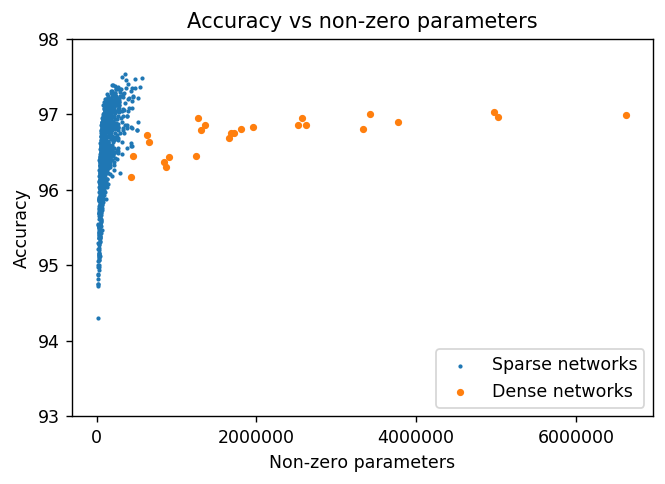

In [84]:
fig = plt.figure(dpi=125)
plt.title("Accuracy vs non-zero parameters")
plt.xlabel("Non-zero parameters")
plt.ylabel("Accuracy")
plt.ylim(93, 98)
plt.scatter(sparse_wts_id["non_zero_params"], sparse_wts_id["mean_accuracy"], label="Sparse networks", s=2)
plt.scatter(dense_id["non_zero_params"], dense_id["mean_accuracy"], label="Dense networks", s=10)
plt.xticks(np.arange(0, 7000000, 2000000))
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_all_configurations.png", dpi=300)

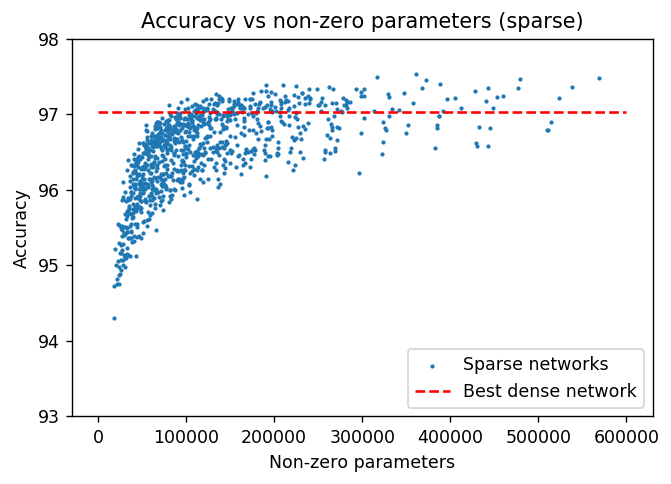

In [34]:
fig = plt.figure(dpi=125)
plt.title("Accuracy vs non-zero parameters (sparse)")
plt.xlabel("Non-zero parameters")
plt.ylabel("Accuracy")
plt.ylim(93, 98)
plt.xticks(np.arange(0, 400001, 100000))
plt.scatter(sparse_wts_id["non_zero_params"], sparse_wts_id["mean_accuracy"], label="Sparse networks", s=2)
plt.hlines(best_dense_accuracy, 0, 600001, label="Best dense network", linestyle="dashed", colors="red")
plt.xticks(np.arange(0, 600001, 100000))
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_sparse_wts_configurations.png", dpi=300)

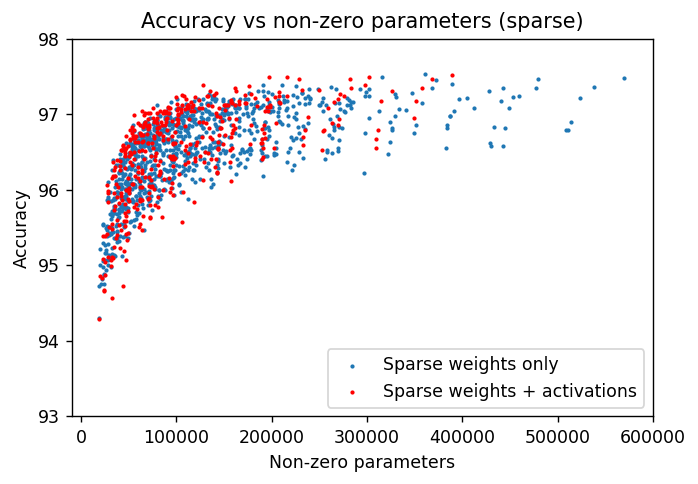

In [151]:
fig = plt.figure(dpi=125)
plt.title("Accuracy vs non-zero parameters (sparse)")
plt.xlabel("Non-zero parameters")
plt.ylabel("Accuracy")
plt.ylim(93, 98)
plt.xticks(np.arange(0, 400001, 100000))
plt.scatter(sparse_wts_id["non_zero_params"], sparse_wts_id["mean_accuracy"], label="Sparse weights only", s=2)
plt.xticks(np.arange(0, 600001, 100000))
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_sparse_configurations.png", dpi=300)
plt.scatter(sparse_activations_id["non_zero_params"], sparse_activations_id["mean_accuracy"], label="Sparse weights + activations", s=2, c="red")
# plt.hlines(best_dense_accuracy, 0, 600001, label="Best dense network", linestyle="dashed", colors="green")
plt.xticks(np.arange(0, 600001, 100000))
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_all_sparse_configurations.png", dpi=300)

*Each dot in the plot above shows one network configuration. The accuracy is an average over 4 random seeds.*

## Plotting accuracy vs dimensionality

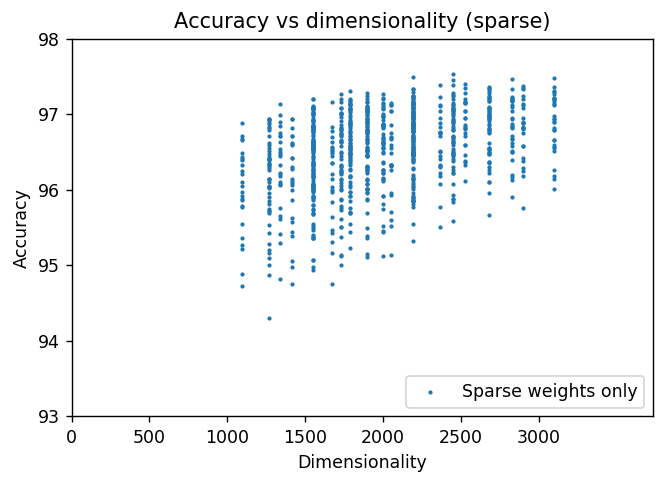

In [36]:
fig = plt.figure(dpi=125)
plt.title("Accuracy vs dimensionality (sparse)")
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")
plt.ylim(93, 98)
plt.xticks(np.arange(0, 400001, 100000))
plt.scatter(sparse_wts_id["dimensions"], sparse_wts_id["mean_accuracy"], label="Sparse weights only", s=2)
#plt.scatter(sparse_activations_id["dimensions"], sparse_activations_id["mean_accuracy"], label="Sparse weights + activations", s=2, c="red")
plt.xticks(np.arange(0, 3100, 500))
plt.legend(loc="lower right")

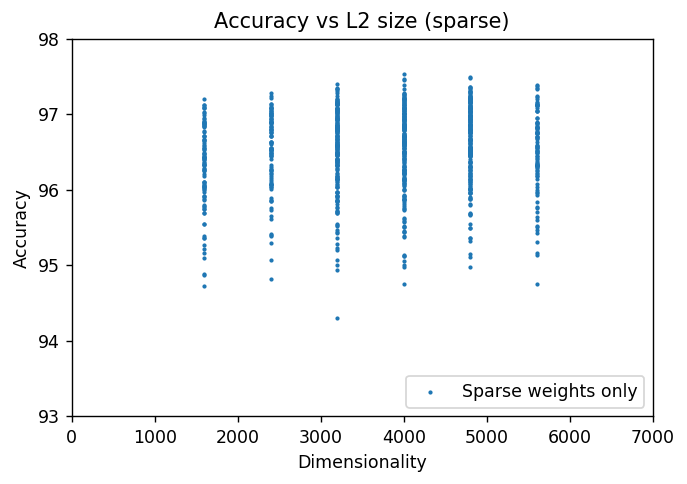

In [83]:
fig = plt.figure(dpi=125)
plt.title("Accuracy vs L2 size (sparse)")
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")
plt.ylim(93, 98)
plt.scatter(sparse_wts_id["l3_dim"], sparse_wts_id["mean_accuracy"], label="Sparse weights only", s=2)
#plt.scatter(sparse_activations_id["dimensions"], sparse_activations_id["mean_accuracy"], label="Sparse weights + activations", s=2, c="red")
plt.xticks(np.arange(0, 8000, 1000))
plt.legend(loc="lower right")

In [37]:
sparse_wts_dimensionality = sparse_wts_id.groupby("dimensions").agg(
        accuracy=('mean_accuracy', "max"),
        dimensions=('dimensions', "first"),
)

In [38]:
sparse_activations_dimensionality = sparse_activations_id.groupby("dimensions").agg(
        accuracy=('mean_accuracy', "max"),
        dimensions=('dimensions', "first"),
)

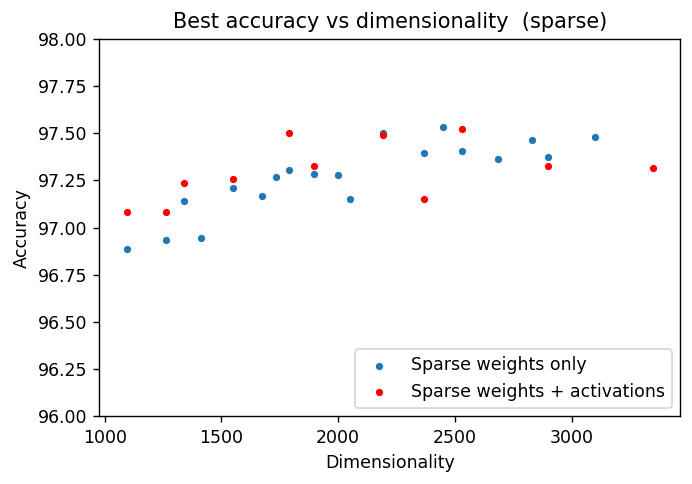

In [147]:
fig = plt.figure(dpi=125)
plt.title("Best accuracy vs dimensionality  (sparse)")
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")
plt.ylim(96, 98)
#plt.xticks(np.arange(0, 400001, 100000))
plt.scatter(sparse_wts_dimensionality["dimensions"], sparse_wts_dimensionality["accuracy"], label="Sparse weights only", s=10)
#plt.hlines(best_dense_accuracy, 1000, 3000, label="Best dense network", linestyle="dashed", colors="red")
plt.xticks(np.arange(1000, 3100, 500))
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_vs_dimensions_sparse.png", dpi=300)
plt.scatter(sparse_activations_dimensionality["dimensions"], sparse_activations_dimensionality["accuracy"], label="Sparse weights + activations", s=10, c="red")
plt.xticks(np.arange(1000, 3100, 500))
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_vs_dimensions_sparse_all.png", dpi=300)

*Each dot in the plot above shows one network configuration. The accuracy is the max accuracy for that dimensionality (pareto frontier).

In [52]:
sparse_wts_l3_dim = sparse_wts_id.groupby("l3_dim").agg(
        accuracy=('mean_accuracy', "max"),
        l3_dim=('l3_dim', "first"),
)

In [57]:
sparse_activations_l3_dim = sparse_activations_id.groupby("l3_dim").agg(
        accuracy=('mean_accuracy', "max"),
        l3_dim=('l3_dim', "first"),
)

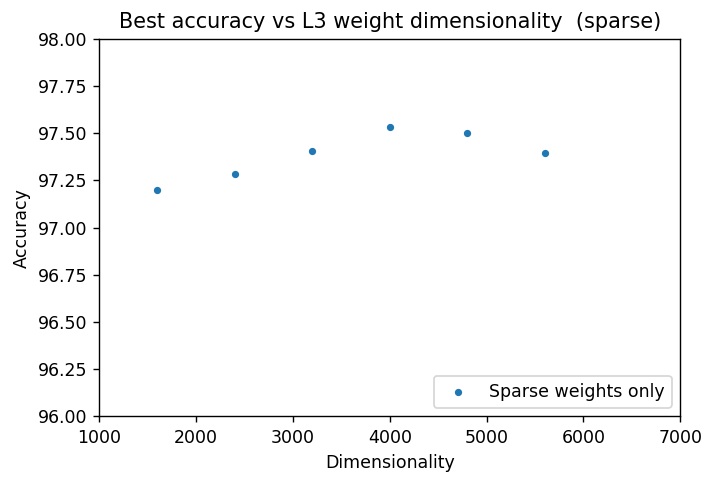

In [89]:
fig = plt.figure(dpi=125)
plt.title("Best accuracy vs L3 weight dimensionality  (sparse)")
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")
plt.ylim(96, 98)
plt.scatter(sparse_wts_l3_dim["l3_dim"], sparse_wts_l3_dim["accuracy"], label="Sparse weights only", s=10)
#plt.scatter(sparse_activations_l3_dim["l3_dim"], sparse_activations_l3_dim["accuracy"], label="Sparse weights + activations", s=10, c="red")
plt.xticks(np.arange(1000, 7100, 1000))
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_vs_l3_dimensions.png", dpi=300)

In [70]:
sparse_wts_l3_n = sparse_wts_id.groupby("l3_n").agg(
        accuracy=('mean_accuracy', "max"),
        l3_n=('l3_n', "first"),
)

In [71]:
sparse_activations_l3_n = sparse_activations_id.groupby("l3_n").agg(
        accuracy=('mean_accuracy', "max"),
        l3_n=('l3_n', "first"),
)

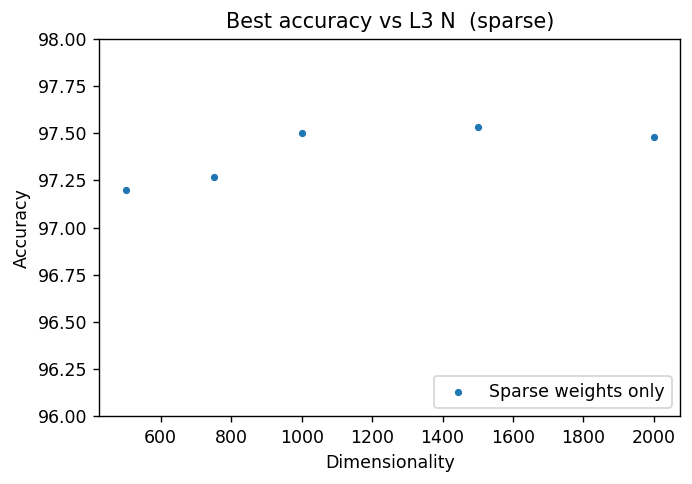

In [99]:
fig = plt.figure(dpi=125)
plt.title("Best accuracy vs L3 N  (sparse)")
plt.xlabel("Dimensionality")
plt.ylabel("Accuracy")
plt.ylim(96, 98)
plt.scatter(sparse_wts_l3_n["l3_n"], sparse_wts_l3_n["accuracy"], label="Sparse weights only", s=10)
#plt.scatter(sparse_activations_l3_n["l3_n"], sparse_activations_l3_n["accuracy"], label="Sparse weights + activations", s=10, c="red")
plt.legend(loc="lower right")
plt.savefig("plots/accuracies_vs_l3_n.png", dpi=300)

## Dataframe containing accurate network configurations

In [40]:
sparse_wts_accurate = sparse_wts_id[sparse_wts_id["mean_accuracy"] >= best_dense_accuracy]

In [41]:
sparse_wts_accurate.describe()

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,num_trials
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,97.171135,72.658824,161.505882,1382.352941,1816.470588,4037.647059,0.0,0.879941,0.967294,209.223529,130.894118,2286.818599,221405.929412,4.0
std,0.107645,14.258437,41.308659,470.408728,356.460927,1032.716470,0.0,0.059251,0.015737,90.258324,72.460072,451.023283,100271.520471,0.0
min,97.031740,64.000000,64.000000,500.000000,1600.000000,1600.000000,0.0,0.800000,0.950000,32.000000,16.000000,1341.640786,80220.000000,4.0
25%,97.090517,64.000000,128.000000,1000.000000,1600.000000,3200.000000,0.0,0.800000,0.950000,160.000000,80.000000,1897.366596,149512.000000,4.0
50%,97.149295,64.000000,160.000000,1500.000000,1600.000000,4000.000000,0.0,0.900000,0.975000,160.000000,120.000000,2190.890230,196850.000000,4.0
75%,97.217868,96.000000,192.000000,2000.000000,2400.000000,4800.000000,0.0,0.900000,0.980000,320.000000,200.000000,2683.281573,269481.000000,4.0
max,97.531348,96.000000,224.000000,2000.000000,2400.000000,5600.000000,0.0,0.980000,0.995000,320.000000,280.000000,3098.386677,569308.000000,4.0


In [43]:
sparse_wts_accurate_pareto = sparse_wts_accurate.groupby("dimensions").agg(
        accuracy=('mean_accuracy', "max"),
        non_zero_params=('non_zero_params', "min"),
        dimensionality=('dimensions', "first"),
        l3_wts_per_unit=("l3_wts_per_unit", "min"),
        l2_wts_per_kernel=("l2_wts_per_kernel", "min"),
)

In [44]:
sparse_activations_accurate = sparse_activations_id[sparse_activations_id["mean_accuracy"] >= best_dense_accuracy]

In [45]:
sparse_activations_accurate.describe()

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,num_trials
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,97.193325,66.408602,120.430108,1548.387097,1660.215054,3010.752688,0.0,0.877742,0.969785,198.365591,86.107527,2102.922049,172431.526882,4.0
std,0.125000,8.488146,44.610244,448.817989,212.203648,1115.256099,0.0,0.068749,0.014889,107.419109,42.641443,512.112562,73254.973826,0.0
min,97.031740,64.000000,64.000000,750.000000,1600.000000,1600.000000,0.0,0.800000,0.950000,32.000000,8.000000,1095.445115,64220.000000,4.0
25%,97.100313,64.000000,96.000000,1000.000000,1600.000000,2400.000000,0.0,0.800000,0.950000,80.000000,60.000000,1788.854382,115220.000000,4.0
50%,97.159091,64.000000,128.000000,1500.000000,1600.000000,3200.000000,0.0,0.900000,0.975000,160.000000,80.000000,2190.890230,157496.000000,4.0
75%,97.257053,64.000000,128.000000,2000.000000,1600.000000,3200.000000,0.0,0.950000,0.980000,320.000000,120.000000,2529.822128,207320.000000,4.0
max,97.521552,96.000000,224.000000,2000.000000,2400.000000,5600.000000,0.0,0.980000,0.995000,320.000000,160.000000,3346.640106,388764.000000,4.0


In [46]:
sparse_activations_accurate_pareto = sparse_activations_accurate.groupby("dimensions").agg(
        accuracy=('mean_accuracy', "max"),
        non_zero_params=('non_zero_params', "min"),
        dimensionality=('dimensions', "first"),
        l3_wts_per_unit=("l3_wts_per_unit", "min"),
        l2_wts_per_kernel=("l2_wts_per_kernel", "min"),
)

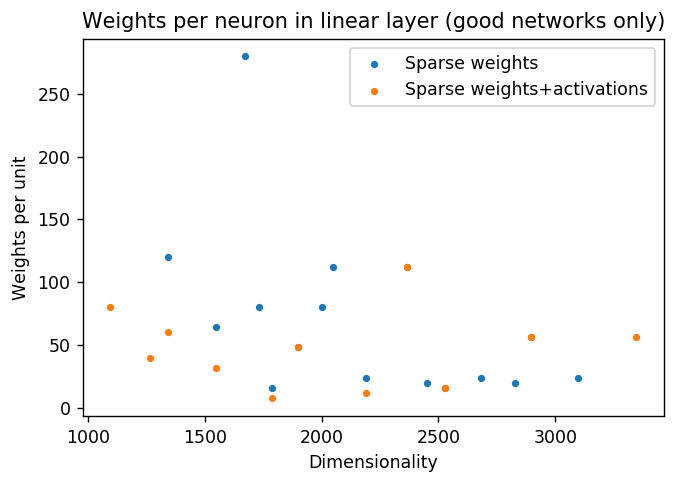

In [133]:
fig = plt.figure(dpi=125)
plt.title("Weights per neuron in linear layer (good networks only)")
plt.xlabel("Dimensionality")
plt.ylabel("Weights per unit")
plt.scatter(sparse_wts_accurate_pareto["dimensionality"], sparse_wts_accurate_pareto["l3_wts_per_unit"], label="Sparse weights", s=10)
plt.legend(loc="upper right")
plt.savefig("plots/l3_wts_per_neuron.png", dpi=300)
plt.scatter(sparse_activations_accurate_pareto["dimensionality"], sparse_activations_accurate_pareto["l3_wts_per_unit"], label="Sparse weights+activations", s=10)
plt.legend(loc="upper right")
plt.savefig("plots/l3_wts_per_neuron_all.png", dpi=300)

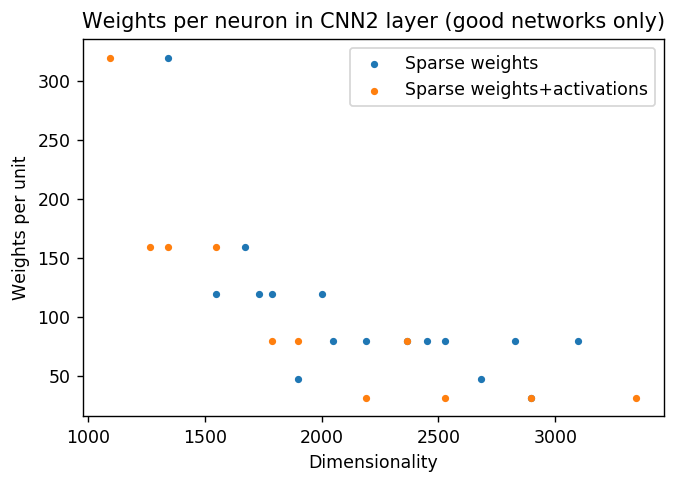

In [135]:
fig = plt.figure(dpi=125)
plt.title("Weights per neuron in CNN2 layer (good networks only)")
plt.xlabel("Dimensionality")
plt.ylabel("Weights per unit")
plt.scatter(sparse_wts_accurate_pareto["dimensionality"], sparse_wts_accurate_pareto["l2_wts_per_kernel"], label="Sparse weights", s=10)
plt.legend(loc="upper right")
plt.savefig("plots/l2_wts_per_neuron.png", dpi=300)
plt.scatter(sparse_activations_accurate_pareto["dimensionality"], sparse_activations_accurate_pareto["l2_wts_per_kernel"], label="Sparse weights+activations", s=10)
plt.legend(loc="upper right")
plt.savefig("plots/l2_wts_per_neuron_all.png", dpi=300)

## Dataframe containing highly accurate networks

In [160]:
sparse_wts_id[(sparse_wts_id["mean_accuracy"] >= 97.5) & (sparse_wts_id["non_zero_params"]<2000000)]

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,config,num_trials
config,,,,,,,,,,,,,,,
Sparse_Baselines2 cnn_out_channels=(64 192)cnn_weight_sparsity=(0.0 0.2)linear_n=(1000)weight_sparsity=(0.05),97.501959,64,192,1000,1600,4800,0.0,0.8,0.95,320.0,240.0,2190.890230,316308,Sparse_Baselines2 cnn_out_channels=(64 192)cnn...,4
Sparse_Baselines4 cnn_out_channels=(96 160)cnn_weight_sparsity=(0.0 0.1)linear_n=(1500)weight_sparsity=(0.05),97.531348,96,160,1500,2400,4000,0.0,0.9,0.95,240.0,200.0,2449.489743,360568,Sparse_Baselines4 cnn_out_channels=(96 160)cnn...,4


In [141]:
sparse_activations_id[(sparse_activations_id["mean_accuracy"] >= 97.03) & (sparse_activations_id["non_zero_params"]<100000)]

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,config,num_trials
config,,,,,,,,,,,,,,,
Kwinner_Sparse_Baselines cnn_out_channels=(64 128)cnn_weight_sparsity=(0.0 0.1)linear_n=(1000)weight_sparsity=(0.02),97.227665,64,128,1000,1600,3200,0.0,0.9,0.980,160.0,64.0,1788.854382,99284,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 64)cnn_weight_sparsity=(0.0 0.2)linear_n=(1000)weight_sparsity=(0.025),97.080721,64,64,1000,1600,1600,0.0,0.8,0.975,320.0,40.0,1264.911064,75220,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 64)cnn_weight_sparsity=(0.0 0.2)linear_n=(1500)weight_sparsity=(0.02),97.051332,64,64,1500,1600,1600,0.0,0.8,0.980,320.0,32.0,1549.193338,89720,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 64)cnn_weight_sparsity=(0.0 0.2)linear_n=(2000)weight_sparsity=(0.005),97.041536,64,64,2000,1600,1600,0.0,0.8,0.995,320.0,8.0,1788.854382,64220,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 64)cnn_weight_sparsity=(0.0 0.2)linear_n=(750)weight_sparsity=(0.05),97.080721,64,64,750,1600,1600,0.0,0.8,0.950,320.0,80.0,1095.445115,91970,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 96)cnn_weight_sparsity=(0.0 0.1)linear_n=(2000)weight_sparsity=(0.01),97.100313,64,96,2000,1600,2400,0.0,0.9,0.990,160.0,24.0,2190.890230,91132,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 96)cnn_weight_sparsity=(0.0 0.2)linear_n=(1000)weight_sparsity=(0.02),97.080721,64,96,1000,1600,2400,0.0,0.8,0.980,320.0,48.0,1549.193338,93492,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 96)cnn_weight_sparsity=(0.0 0.2)linear_n=(2000)weight_sparsity=(0.005),97.041536,64,96,2000,1600,2400,0.0,0.8,0.995,320.0,12.0,2190.890230,82492,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4
Kwinner_Sparse_Baselines cnn_out_channels=(64 96)cnn_weight_sparsity=(0.0 0.2)linear_n=(750)weight_sparsity=(0.025),97.041536,64,96,750,1600,2400,0.0,0.8,0.975,320.0,60.0,1341.640786,87242,Kwinner_Sparse_Baselines cnn_out_channels=(64 ...,4


In [167]:
dense_id[(dense_id["mean_accuracy"] >= 96.9)].describe()

,mean_accuracy,l1_channels,l2_channels,l3_n,l2_dim,l3_dim,l1_wt_sparsity,l2_wt_sparsity,l3_wt_sparsity,l2_wts_per_kernel,l3_wts_per_unit,dimensions,non_zero_params,num_trials
count,7.000000,7.0,7.000000,7.00000,7.0,7.000000,7.0,7.0,7.0,7.0,7.000000,7.000000,7.000000e+00,7.0
mean,96.971563,64.0,100.571429,1500.00000,1600.0,2514.285714,0.0,0.0,0.0,1600.0,2514.285714,1891.780289,3.953619e+06,4.0
std,0.041341,0.0,34.209439,408.24829,0.0,855.235974,0.0,0.0,0.0,0.0,855.235974,474.020284,1.770517e+06,0.0
min,96.904389,64.0,32.000000,1000.00000,1600.0,800.000000,0.0,0.0,0.0,1600.0,800.000000,1095.445115,1.272408e+06,4.0
25%,96.953370,64.0,96.000000,1250.00000,1600.0,2400.000000,0.0,0.0,0.0,1600.0,2400.000000,1669.023860,2.993988e+06,4.0
50%,96.963166,64.0,96.000000,1500.00000,1600.0,2400.000000,0.0,0.0,0.0,1600.0,2400.000000,1897.366596,3.774872e+06,4.0
75%,96.997453,64.0,128.000000,1750.00000,1600.0,3200.000000,0.0,0.0,0.0,1600.0,3200.000000,2190.890230,5.003738e+06,4.0
max,97.031740,64.0,128.000000,2000.00000,1600.0,3200.000000,0.0,0.0,0.0,1600.0,3200.000000,2529.822128,6.632604e+06,4.0


## Dataframes comparing large and small network configurations

### TODOs

Create dataframes containing M channels in L2, and df's containing N units in L3.  
Or, plot params count as a function of L2 channels, or L3 channels, or some combination of both.

Determine the number of non-zero weights per weight vector for L2 and L3 for each configuration.

## Quantifying learning speed

Here we would look at all good networks and figure out $T_{min}$ - how fast the network reached accuracy over 97%. At that point we can plot $T_{min}$ as a function of dimensionality, sparsity, etc.